In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [2]:
from copy import deepcopy
bedrooms=df['total_bedrooms']
df = df.drop(['total_bedrooms', 'longitude', 'latitude', 'housing_median_age', 'median_income', 'median_house_value'], axis=1)
df['bedrooms'] = bedrooms
df

,total_rooms,population,households,bedrooms
0,5612.0,1015.0,472.0,1283.0
1,7650.0,1129.0,463.0,1901.0
2,720.0,333.0,117.0,174.0
3,1501.0,515.0,226.0,337.0
4,1454.0,624.0,262.0,326.0
...,...,...,...,...
16995,2217.0,907.0,369.0,394.0
16996,2349.0,1194.0,465.0,528.0
16997,2677.0,1244.0,456.0,531.0
16998,2672.0,1298.0,478.0,552.0


Text(0.5, 0, 'Total Bedrooms')

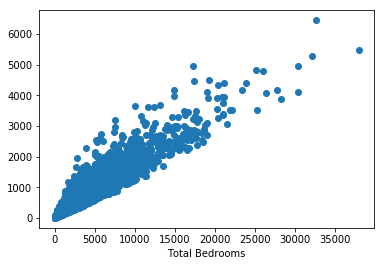

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['total_rooms'],df['bedrooms'])
plt.xlabel('Total Rooms')
plt.xlabel('Total Bedrooms')

Text(0.5, 0, 'Total Bedrooms')

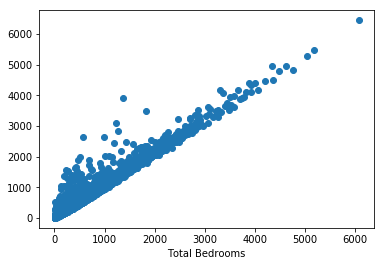

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['households'],df['bedrooms'])
plt.xlabel('households')
plt.xlabel('Total Bedrooms')

In [5]:
df_np=df.to_numpy()
df_np.shape

(17000, 4)

In [6]:
X_train,y_train=df_np[:,:3],df_np[:,-1]
X_train.shape,y_train.shape

((17000, 3), (17000,))

In [7]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [8]:
def get_predictions(model,X):
    (n,p_minus_one)=X.shape
    p=p_minus_one+1
    new_x=np.ones(shape=(n,p))
    new_x[:,1:]=X
    
    return np.dot(new_x,model)

In [9]:
test_model=np.array([1/4,1/4,1/4,1/4])
get_predictions(test_model,X_train)

array([1775.  , 2310.75,  292.75, ..., 1094.5 , 1112.25,  724.25])

In [10]:
get_predictions(test_model,X_train).shape

(17000,)

In [11]:
df['Test Predictions']=get_predictions(test_model,X_train)
df

,total_rooms,population,households,bedrooms,Test Predictions
0,5612.0,1015.0,472.0,1283.0,1775.00
1,7650.0,1129.0,463.0,1901.0,2310.75
2,720.0,333.0,117.0,174.0,292.75
3,1501.0,515.0,226.0,337.0,560.75
4,1454.0,624.0,262.0,326.0,585.25
...,...,...,...,...,...
16995,2217.0,907.0,369.0,394.0,873.50
16996,2349.0,1194.0,465.0,528.0,1002.25
16997,2677.0,1244.0,456.0,531.0,1094.50
16998,2672.0,1298.0,478.0,552.0,1112.25


In [12]:
mean_absolute_error(df['Test Predictions'],y_train)

604.5488970588235

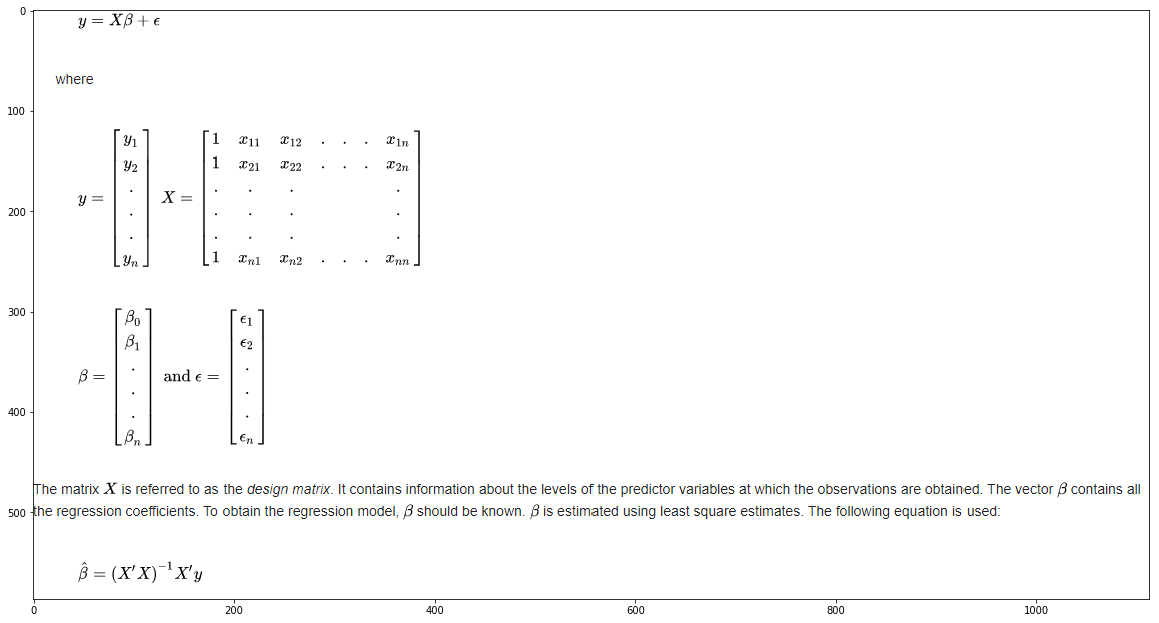

In [13]:
#Formula
pic=plt.imread('C:\\Users\\nafissaad\\Tutorial\\Math\\Regression code from Scatch\\Multiple Linear Regression\\Capture.PNG')
plt.figure(figsize = (20,20))
plt.imshow(pic)

In [14]:
from numpy.linalg import inv
def get_best_model(X,y):
    (n,p_minus_one)=X.shape
    p=p_minus_one+1
    new_x=np.ones(shape=(n,p))
    new_x[:,1:]=X
    return np.dot(np.dot(inv(np.dot(new_x.T,new_x)),new_x.T),y)

In [15]:
get_best_model(X_train,y_train)

array([ 1.5496502 ,  0.03619529, -0.03248088,  0.9748312 ])

In [16]:
test_model=get_best_model(X_train,y_train)
df['Test Predictions']=get_predictions(test_model,X_train)
df

,total_rooms,population,households,bedrooms,Test Predictions
0,5612.0,1015.0,472.0,1283.0,631.829860
1,7650.0,1129.0,463.0,1901.0,693.119562
2,720.0,333.0,117.0,174.0,130.849378
3,1501.0,515.0,226.0,337.0,259.462982
4,1454.0,624.0,262.0,326.0,289.315311
...,...,...,...,...,...
16995,2217.0,907.0,369.0,394.0,412.047168
16996,2349.0,1194.0,465.0,528.0,501.086730
16997,2677.0,1244.0,456.0,531.0,502.561260
16998,2672.0,1298.0,478.0,552.0,522.072603


In [17]:
mean_absolute_error(df['Test Predictions'],y_train)

39.67221765070704